# Bin Scatter

This notebook illustrates how to do a binscatter, which is a method studying whether a linear model is a reasonable approximation.

## Load Packages and Extra Functions

The key function `BinScatter()` is from the (local) `FinEcmt_OLS` module.

In [1]:
MyModulePath = joinpath(pwd(),"src")
!in(MyModulePath,LOAD_PATH) && push!(LOAD_PATH,MyModulePath)
using FinEcmt_OLS

In [2]:
#=
include(joinpath(pwd(),"src","FinEcmt_OLS.jl"))
using .FinEcmt_OLS
=#

In [3]:
using DelimitedFiles, Statistics, Plots

default(size = (480,320),fmt = :png)

## Loading Data

In [4]:
x  = readdlm("Data/FFmFactorsPs.csv",',',skipstart=1)
(Rme,SMB,HML,Rf) = (x[:,2],x[:,3],x[:,4],x[:,5])

x  = readdlm("Data/FF25Ps.csv",',') #no header line
R  = x[:,2:end]                     #returns for 25 FF portfolios
Re = R .- Rf                        #excess returns for the 25 FF portfolios

T = size(Re,1)                      #number of observations

388

In [5]:
y  = Re[:,6]                #to the notation used in comment, use asset 6
x₁ = [Rme SMB]              #1st set of regressors (2), no intercept
x₂ = HML;                   #2nd set of regressors, which we focus on

## A Function for a Bin Scatter

We want to assess whether $y_t$ and a single variable $x_{2t}$ are linearly related, controlling for the vector $x_{1t}$.

Consider the regression

$y_{t}=x_{1t}^{\prime}\gamma+d_t^{\prime}\beta+u_t$

where $x_{1t}$ is a vector (possibly empty) of control variables and $d_t$ is an $N\times1$ dummy vector indicating whether the single variable $x_{2t}$ belongs to each the bins. (Clearly, only one element in $d_t$ is one and the rest are zero). A common choice is to use the (minimum, 10th percentile, 20th percentile,...,  maximum) as bin boundaries.

If the $\beta$ estimates for a linear pattern, then a linear regression is a reasonable choice.

In [6]:
@doc2 BinScatter

```
BinScatter(y,x₁,x₂,L=[],U=[],N=20,critval=1.645)
```

Do a regression `y = x₁'γ + d'β + u`, where `d` is an N-vector indicating membership in a certain `x₂` bin. Plotting `β` against those bins is a binscatter plot.

### Input:

  * `y::Vector`:         dependent variable
  * `x₁::VecOrMat`:      control variables
  * `x₂::Vector`:        main regressor of interest
  * `L::Vector`:         lower bin boundaries, if [] then quantiles (see N)
  * `U::Vector`:         upper bin boundaries, if [] then quantiles (see N)
  * `N::Vector`:         number of quantiles, giving N+1 bins. Used if `L=U=[]`
  * `critval::Vector`:   for calculation of confidence band

### Output

  * `β::Vector`:         N-vector of coeffs on the bin (x₂) dummies
  * `stdβ::Vector`:      N-vector of std of β
  * `fnO::NamedTuple`:   with (LU,confBand)


In [7]:
#using CodeTracking                #uncomment to see source code
#println(@code_string BinScatter([1],[1],[1]))

## Using the Function

The next few cells calls on the function and plots the results

In [8]:
(β,stdβ,fnO) = BinScatter(y,x₁,x₂,[],[],10)   #use min,10th,20th,... perctiles as bins

(LU,cfB) = (fnO.LU,fnO.confBand)
LUmid = mean(LU,dims=2);                      #mid point of the bins

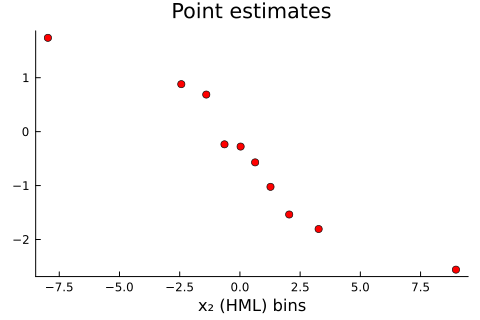

In [9]:
p1 = scatter( LUmid,β,
              title = "Point estimates",
              xlabel = "x₂ (HML) bins",
              markercolor = :red,
              legend = false,
              grid = false )
#vline!(vcat(LU[1,1],LU[:,2]),linecolor=:black,line=(:dash,0.5))
display(p1)

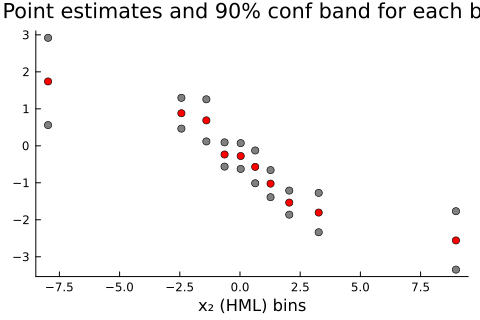

In [10]:
p1 = scatter( LUmid,β,
              title = "Point estimates and 90% conf band for each bin",
              xlabel = "x₂ (HML) bins",
              markercolor = :red,
              legend = false,
              grid = false )
scatter!( LUmid,cfB[:,1],markercolor = :grey )
scatter!( LUmid,cfB[:,2],markercolor = :grey )
#vline!(vcat(LU[1,1],LU[:,2]),linecolor=:black,line=(:dash,0.5))
display(p1)